### Install the package

In [1]:
!git clone https://github.com/divamgupta/image-segmentation-keras

Cloning into 'image-segmentation-keras'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1156 (delta 9), reused 3 (delta 1), pack-reused 1132
Receiving objects: 100% (1156/1156), 3.29 MiB | 40.15 MiB/s, done.
Resolving deltas: 100% (736/736), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
print(os.listdir())
!unzip -q drive/MyDrive/dataset1.zip -d /content/
!mv dataset1 image-segmentation-keras
os.chdir("image-segmentation-keras")

['.config', 'drive', 'image-segmentation-keras', 'sample_data']


In [4]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating keras_segmentation.egg-info
writing keras_segmentation.egg-info/PKG-INFO
writing dependency_links to keras_segmentation.egg-info/dependency_links.txt
writing entry points to keras_segmentation.egg-info/entry_points.txt
writing requirements to keras_segmentation.egg-info/requires.txt
writing top-level names to keras_segmentation.egg-info/top_level.txt
writing manifest file 'keras_segmentation.egg-info/SOURCES.txt'
writing manifest file 'keras_segmentation.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/keras_segmentation
copying keras_segmentation/__main__.py -> build/lib/keras_segmentation
copying keras_segmentation/model_compression.py -> build/lib/keras_segmentation
copying keras_segmentation/cli_interface.py -> build/lib/keras_segmentation
copying keras_segmentation/pretrained.py -> build/lib/keras_segment

In [5]:
%mkdir preds
%mkdir predictions
%mkdir mobilenet_unet_1

### Initialize the model

In [6]:
from keras_segmentation.models.unet import mobilenet_unet

model = mobilenet_unet(n_classes=2 ,  input_height=64, input_width=64)

17227776/17225924 [==============================] - 0s 0us/step


### Train the model

In [7]:
model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "mobilenet_unet_1/" , epochs=10
)

100%|██████████| 242/242 [00:00<00:00, 3345.95it/s]

Verifying training dataset
Dataset verified! 


Epoch 1/10
512/512 [==============================] - 41s 13ms/step - loss: 0.2888 - accuracy: 0.8854

Epoch 00001: saving model to mobilenet_unet_1/.00001
Epoch 2/10
512/512 [==============================] - 6s 13ms/step - loss: 0.1362 - accuracy: 0.9457

Epoch 00002: saving model to mobilenet_unet_1/.00002
Epoch 3/10
512/512 [==============================] - 6s 12ms/step - loss: 0.0977 - accuracy: 0.9594

Epoch 00003: saving model to mobilenet_unet_1/.00003
Epoch 4/10
512/512 [==============================] - 6s 12ms/step - loss: 0.0747 - accuracy: 0.9689

Epoch 00004: saving model to mobilenet_unet_1/.00004
Epoch 5/10
512/512 [==============================] - 6s 12ms/step - loss: 0.0600 - accuracy: 0.9750

Epoch 00005: saving model to mobilenet_unet_1/.00005
Epoch 6/10
512/512 [==============================] - 6s 12ms/step - loss: 0.0478 - accuracy: 0.9803

Epoch 00006: saving model to mobilenet_unet_1/.00006
Epoch 7/10
512/512 [==============================] - 6s 13ms/step - 

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image, clear_output  # to display images

In [9]:
out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/1.png",
    out_fname="preds/out1.png"
)

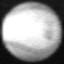

In [10]:
Image(filename='dataset1/images_prepped_test/1.png', width=64)  # train batch 0 mosaics and labels

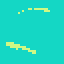

In [11]:
Image(filename='preds/out1.png', width=64)  


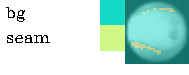

In [12]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/1.png",
    out_fname="preds/out1.png" , overlay_img=True, show_legends=True,
    class_names = [ "bg", "seam"]

)
Image('preds/out1.png')


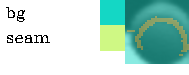

In [13]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/2.png",
    out_fname="preds/out2.png" , overlay_img=True, show_legends=True,
    class_names = [ "bg", "seam"]

)
Image('preds/out2.png')

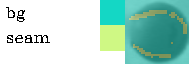

In [14]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/3.png",
    out_fname="preds/out3.png" , overlay_img=True, show_legends=True,
    class_names = [ "bg", "seam"]

)
Image('preds/out3.png')

In [15]:
!python -m keras_segmentation predict \
 --checkpoints_path="mobilenet_unet_1/" \
 --input_path="dataset1/images_prepped_test/" \
 --output_path="predictions/"

2021-03-17 13:27:08.188175: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-03-17 13:27:09.406691: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-17 13:27:09.407635: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-17 13:27:09.414180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-03-17 13:27:09.414657: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-03-17 13:27:09.414708: I tensorflow/stream_executor/platform/default/dso_loade

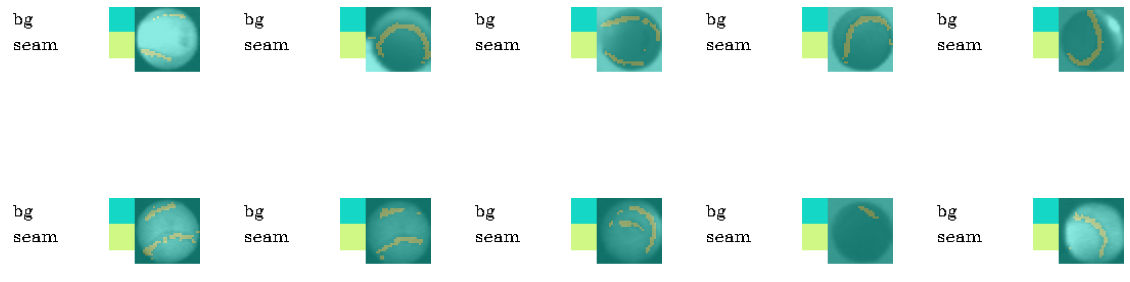

In [16]:
import PIL
for i in range(10):

  o = model.predict_segmentation(
      inp=f"dataset1/images_prepped_test/{i+1}.png",
      out_fname=f"preds/out{i+1}.png" , overlay_img=True, show_legends=True,
      class_names = [ "bg", "seam"]

)
  
plt.figure(figsize=(20,10))
columns = 5
for i in range(10):
    image = PIL.Image.open(f"preds/out{i+1}.png")
    plt.subplot(10 / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis("off")

convert folder to a zip, that zip file will include prediction images

In [17]:
import shutil
shutil.make_archive('predictions', 'zip', 'predictions')

'/content/image-segmentation-keras/predictions.zip'

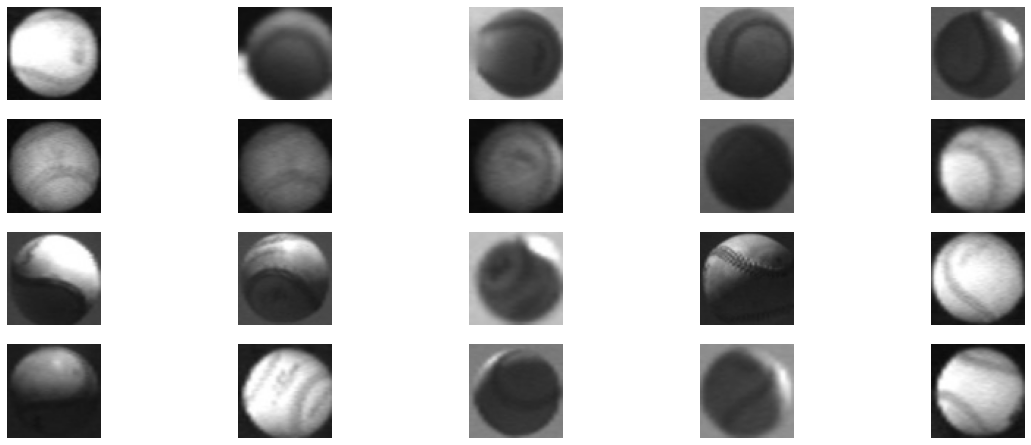

In [18]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(20):
    image = PIL.Image.open(f"dataset1/images_prepped_test/{i+1}.png")
    plt.subplot(20 / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis("off")

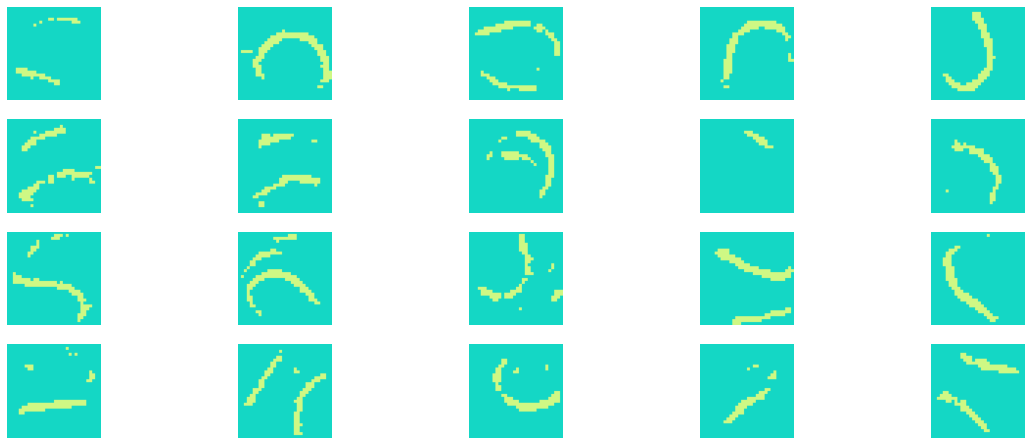

In [19]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(20):
    image = PIL.Image.open(f"predictions/{i+1}.png")
    plt.subplot(20 / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis("off")

evaluate the model.

In [20]:
print(model.evaluate_segmentation( inp_images_dir="dataset1/images_prepped_test/"  , annotations_dir="dataset1/annotations_prepped_test/" ) )

61it [00:02, 30.37it/s]

{'frequency_weighted_IU': 0.866437883280311, 'mean_IU': 0.6800860333669122, 'class_wise_IU': array([0.92033953, 0.43983254])}


save the weights


In [21]:
model.save_weights("seam_model_weights.h5")

save the model

In [22]:
model.save('seam_model.h5')
